**Problem Statement:**

Prediction of the Ratings of Cereals

**APPROACH :**

1)Data Cleaning & Pre-Processing

2)Exploratory Data Analysis

3)Machine Learning Modeling

 a.Regression

 b.Classification
4)Model Comparison & Validation

**IMPORTING** **LIBRARIES**


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
!unzip '/content/80 CERALS.zip'

unzip:  cannot find or open /content/80 CERALS.zip, /content/80 CERALS.zip.zip or /content/80 CERALS.zip.ZIP.


In [ ]:
data = pd.read_csv('/content/cereal.csv')
df=pd.DataFrame(data)
df.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


1. **Data** **Cleaning** **bold text**& **Pre**-**Processing**

In [ ]:
df.shape

(77, 16)

In [ ]:

header=df.columns
print(header)

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')


In [ ]:

df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [ ]:

df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
df[df['carbo'] <0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [ ]:
df[df['potass']<0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816


In [ ]:
df[df['sugars']<0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [ ]:

df[df['fiber']==14]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


In [ ]:
data=df.values
data=list(data)

In [ ]:
data.pop(4)
data.pop(19)
data.pop(55)

#removing the outlier row:
data.pop(3)

array(['All-Bran with Extra Fiber', 'K', 'C', 50, 4, 0, 140, 14.0, 8.0, 0,
       330, 25, 3, 1.0, 0.5, 93.704912], dtype=object)

In [ ]:
df_new=pd.DataFrame(data)
df_new.columns=header
df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
4,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094


In [ ]:
df_new.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,107.808219,2.493151,1.013699,162.671233,2.013699,14.821918,7.205479,95.342466,29.109589,2.205479,1.031233,0.826027,41.668593
std,18.800604,1.068791,1.006826,83.300336,1.996477,3.836385,4.307483,65.871976,22.443486,0.832648,0.154434,0.234259,12.750710
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,135.000000,0.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.207582
50%,110.000000,2.000000,1.000000,180.000000,2.000000,15.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.105965
75%,110.000000,3.000000,1.000000,220.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,49.787445
max,160.000000,6.000000,5.000000,320.000000,10.000000,23.000000,15.000000,320.000000,100.000000,3.000000,1.500000,1.500000,74.472949


In [ ]:
df_new.shape


(73, 16)

In [ ]:
df_new[df_new.duplicated()==True]


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [ ]:
df.isna().sum()


name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

2. **Exploratory** **Data** **Analysis**

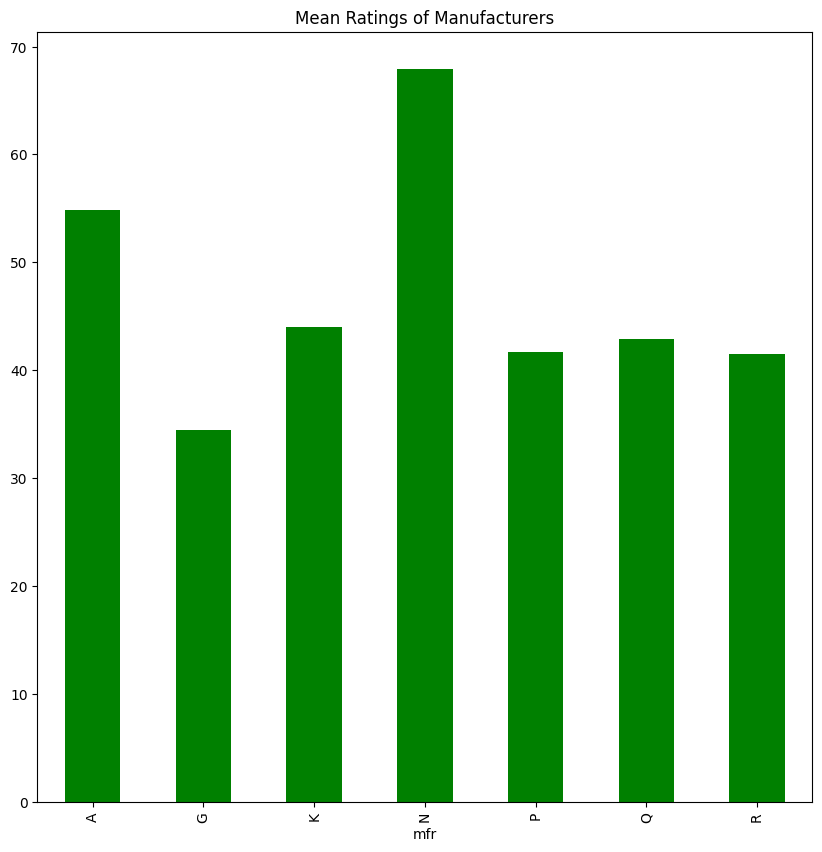

In [ ]:
plt.figure(figsize=(10,10))
df.groupby('mfr')['rating'].mean().plot.bar(color='g')
plt.title('Mean Ratings of Manufacturers')
plt.show()


In [ ]:

df_new.type.value_counts()

C    72
H     1
Name: type, dtype: int64

In [ ]:
df_new.drop(["name","mfr","type","cups"],axis='columns',inplace=True)

In [ ]:
df_new.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,59.425505
3,110,2,2,180,1.5,10.5,10,70,25,1,1.0,29.509541
4,110,2,0,125,1.0,11.0,14,30,25,2,1.0,33.174094


In [ ]:

df_new.shape

(73, 12)

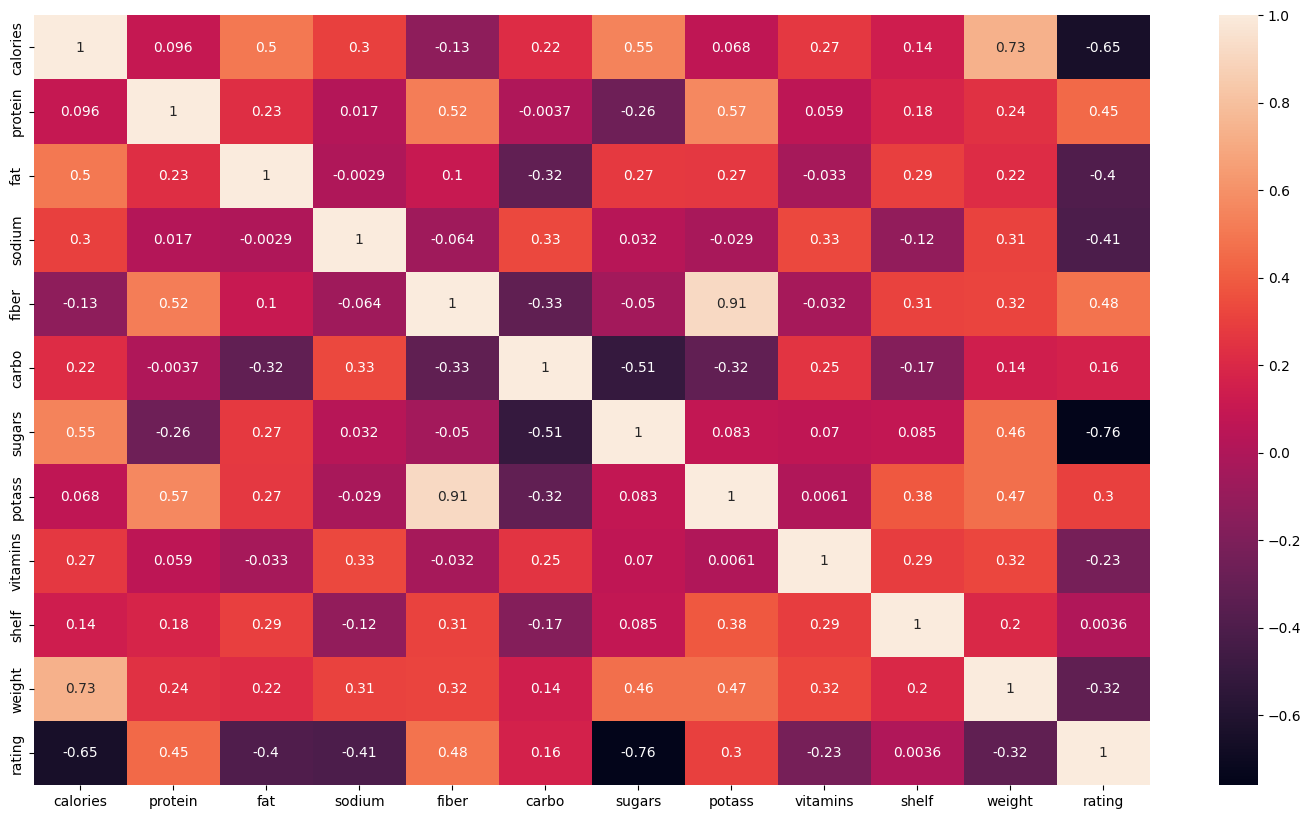

In [ ]:
corr_mat=df_new.corr()
mat=corr_mat.values
plt.figure(figsize=(18,10))
sn.heatmap(corr_mat, annot=True)
plt.show()

In [ ]:
df_new.drop(["weight"],axis='columns',inplace=True)

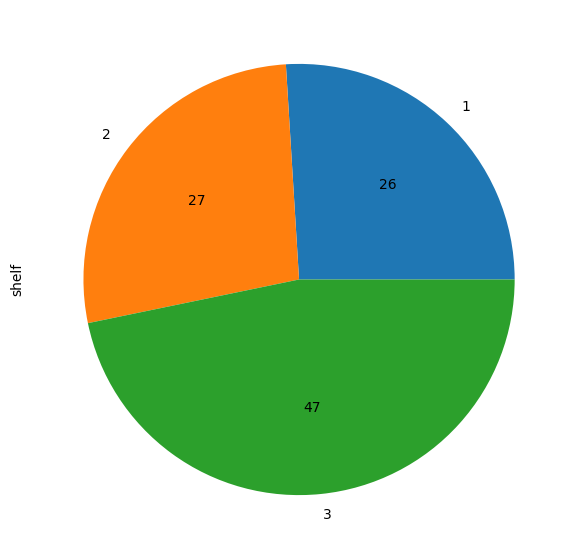

In [ ]:

plt.figure(figsize=(7,7))
df.groupby('shelf')['shelf'].count().plot.pie(autopct = '%2.0f')
plt.show()

In [ ]:
df_new.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,59.425505
3,110,2,2,180,1.5,10.5,10,70,25,1,29.509541
4,110,2,0,125,1.0,11.0,14,30,25,2,33.174094


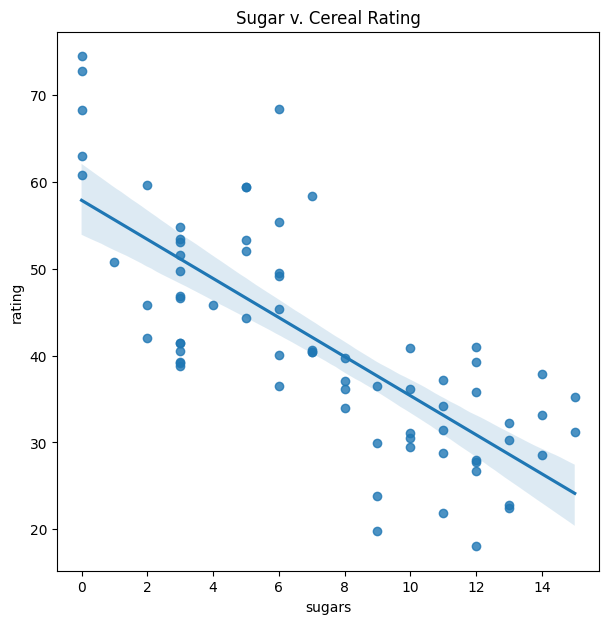

In [ ]:

y_rating=df_new["rating"]
x_sugar=df_new["sugars"]
plt.figure(figsize=(7,7))
sn.regplot(x=x_sugar,y=y_rating) #regression best fit line command
plt.title('Sugar v. Cereal Rating')
plt.show()

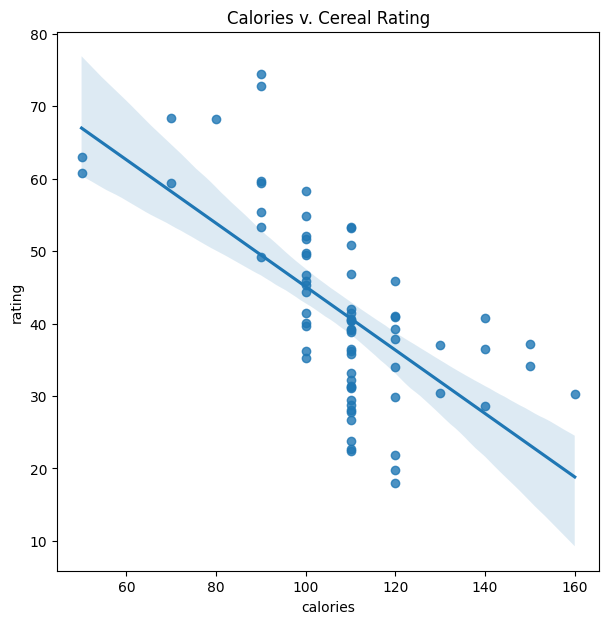

In [ ]:
x_calories=df_new["calories"]
plt.figure(figsize=(7,7))
sn.regplot(x=x_calories,y=y_rating)
plt.title('Calories v. Cereal Rating')
plt.show()

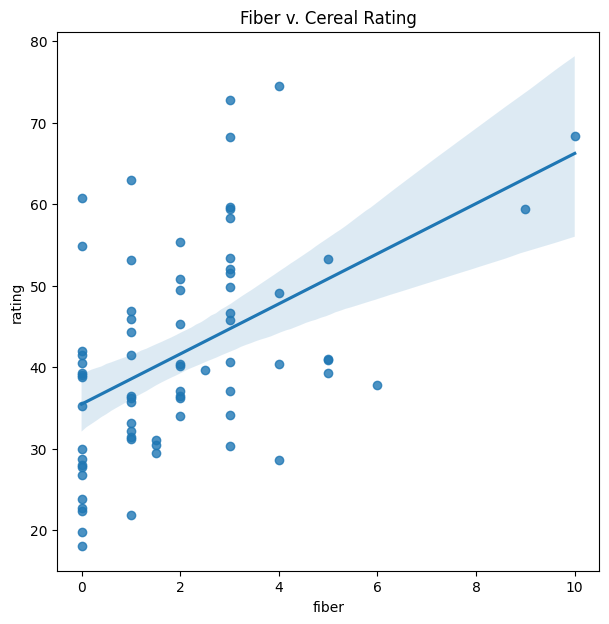

In [ ]:

x_fiber=df_new["fiber"]
plt.figure(figsize=(7,7))
sn.regplot(x=x_fiber,y=y_rating)
plt.title('Fiber v. Cereal Rating')
plt.show()

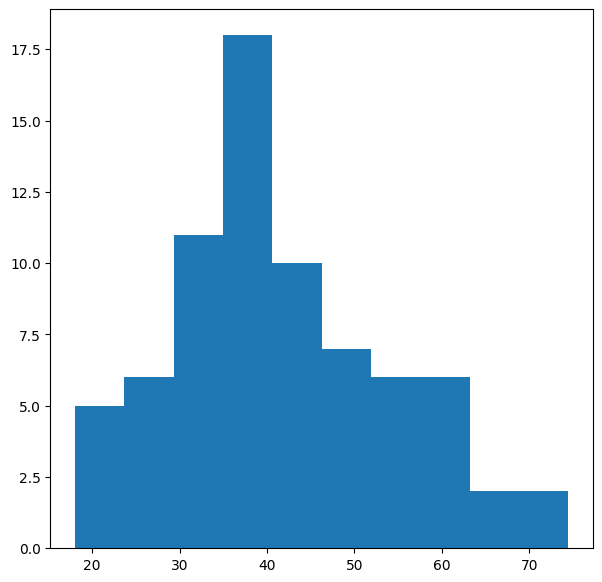

In [ ]:
plt.figure(figsize=(7,7))
plt.hist(y_rating)
plt.show()

**3**. **Machine** **Learning** **Modelling**

**a**)**REGRESSION**

In [ ]:
dummies = pd.get_dummies(df_new['shelf'],prefix='shelf')

In [ ]:

df_new=pd.concat([df_new, dummies], axis=1)

In [ ]:
df_new.drop(["shelf"],axis='columns',inplace=True)


In [ ]:
df_new.head()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating,shelf_1,shelf_2,shelf_3
0,70,4,1,130,10.0,5.0,6,280,25,68.402973,0,0,1
1,120,3,5,15,2.0,8.0,8,135,0,33.983679,0,0,1
2,70,4,1,260,9.0,7.0,5,320,25,59.425505,0,0,1
3,110,2,2,180,1.5,10.5,10,70,25,29.509541,1,0,0
4,110,2,0,125,1.0,11.0,14,30,25,33.174094,0,1,0


In [ ]:
cols = df_new.columns.tolist()
cols.remove('rating')
cols.append('rating')
DF=df_new[cols]
DF.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf_1,shelf_2,shelf_3,rating
0,70,4,1,130,10.0,5.0,6,280,25,0,0,1,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,0,0,1,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,0,0,1,59.425505
3,110,2,2,180,1.5,10.5,10,70,25,1,0,0,29.509541
4,110,2,0,125,1.0,11.0,14,30,25,0,1,0,33.174094


In [ ]:
DF.drop(["shelf_3"],axis='columns',inplace=True)
DF.head()


<ipython-input-38-f318153010e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.drop(["shelf_3"],axis='columns',inplace=True)


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf_1,shelf_2,rating
0,70,4,1,130,10.0,5.0,6,280,25,0,0,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,0,0,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,0,0,59.425505
3,110,2,2,180,1.5,10.5,10,70,25,1,0,29.509541
4,110,2,0,125,1.0,11.0,14,30,25,0,1,33.174094


In [ ]:
d=DF.values
d=list(d)

y=[]
for i in range(0,len(d)):
  y.append(d[i][11])
y=np.array(y)

x=[]
for i in range(0,len(d)):
  x.append(d[i][:11])
x=np.array(x)

In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.235e+16
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:48:41   Log-Likelihood:                 1001.0
No. Observations:                  73   AIC:                            -1978.
Df Residuals:                      61   BIC:                            -1950.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.9272   2.78e-07   1.97e+08      0.000      54.927      54.927
x1            -0.2227   7.28e-09  -3.06e+07      0.000      -0.223      -0.223
x2             3.2732   5.39e-08   6.07e+07      0.000       3.273       3.273
x3            -1.6914    7.8e-08  -2.17e+07      0.000      -1.691      -1.691
x4            -0.0545   4.83e-10  -1.13e+08      0.000      -0.054      -0.054
x5             3.4435    5.3e-08    6.5e+07      0.000       3.443       3.443
x6             1.0925   3.38e-08   3.23e+07      0.000       1.092       1.092
x7            -0.7249   3.26e-08  -2.23e+07      0.000      -0.725      -0.725
x8            -0.0340   1.68e-09  -2.03e+07      0.000      -0.034      -0.034
x9            -0.0512   1.87e-09  -2.74e+07      0.000      -0.051      -0.051
x10         7.447e-08   1.03e-07      0.725      0.471   -1.31e-07     2.8e-07
x11        -1.989e-07   1.06e-07     -1.870      0.066   -4.12e-07    1.37e-08
==============================================================================
Omnibus:                        1.349   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.086
Skew:                          -0.007   Prob(JB):                        0.581
Kurtosis:                       2.403   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:

x=[]
for i in range(0,len(d)):
  x.append(d[i][:9])
x=np.array(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.240e+16
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:49:30   Log-Likelihood:                 797.21
No. Observations:                  58   AIC:                            -1574.
Df Residuals:                      48   BIC:                            -1554.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.9272    2.8e-07   1.96e+08      0.000      54.927      54.927
x1            -0.2227   8.19e-09  -2.72e+07      0.000      -0.223      -0.223
x2             3.2732   7.23e-08   4.53e+07      0.000       3.273       3.273
x3            -1.6914   9.11e-08  -1.86e+07      0.000      -1.691      -1.691
x4            -0.0545   5.09e-10  -1.07e+08      0.000      -0.054      -0.054
x5             3.4435   5.98e-08   5.75e+07      0.000       3.443       3.443
x6             1.0925   3.83e-08   2.85e+07      0.000       1.092       1.092
x7            -0.7249   3.54e-08  -2.05e+07      0.000      -0.725      -0.725
x8            -0.0340   1.79e-09   -1.9e+07      0.000      -0.034      -0.034
x9            -0.0512   1.86e-09  -2.75e+07      0.000      -0.051      -0.051
==============================================================================
Omnibus:                        0.545   Durbin-Watson:                   2.287
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.666
Skew:                          -0.088   Prob(JB):                        0.717
Kurtosis:                       2.505   Cond. No.                     1.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


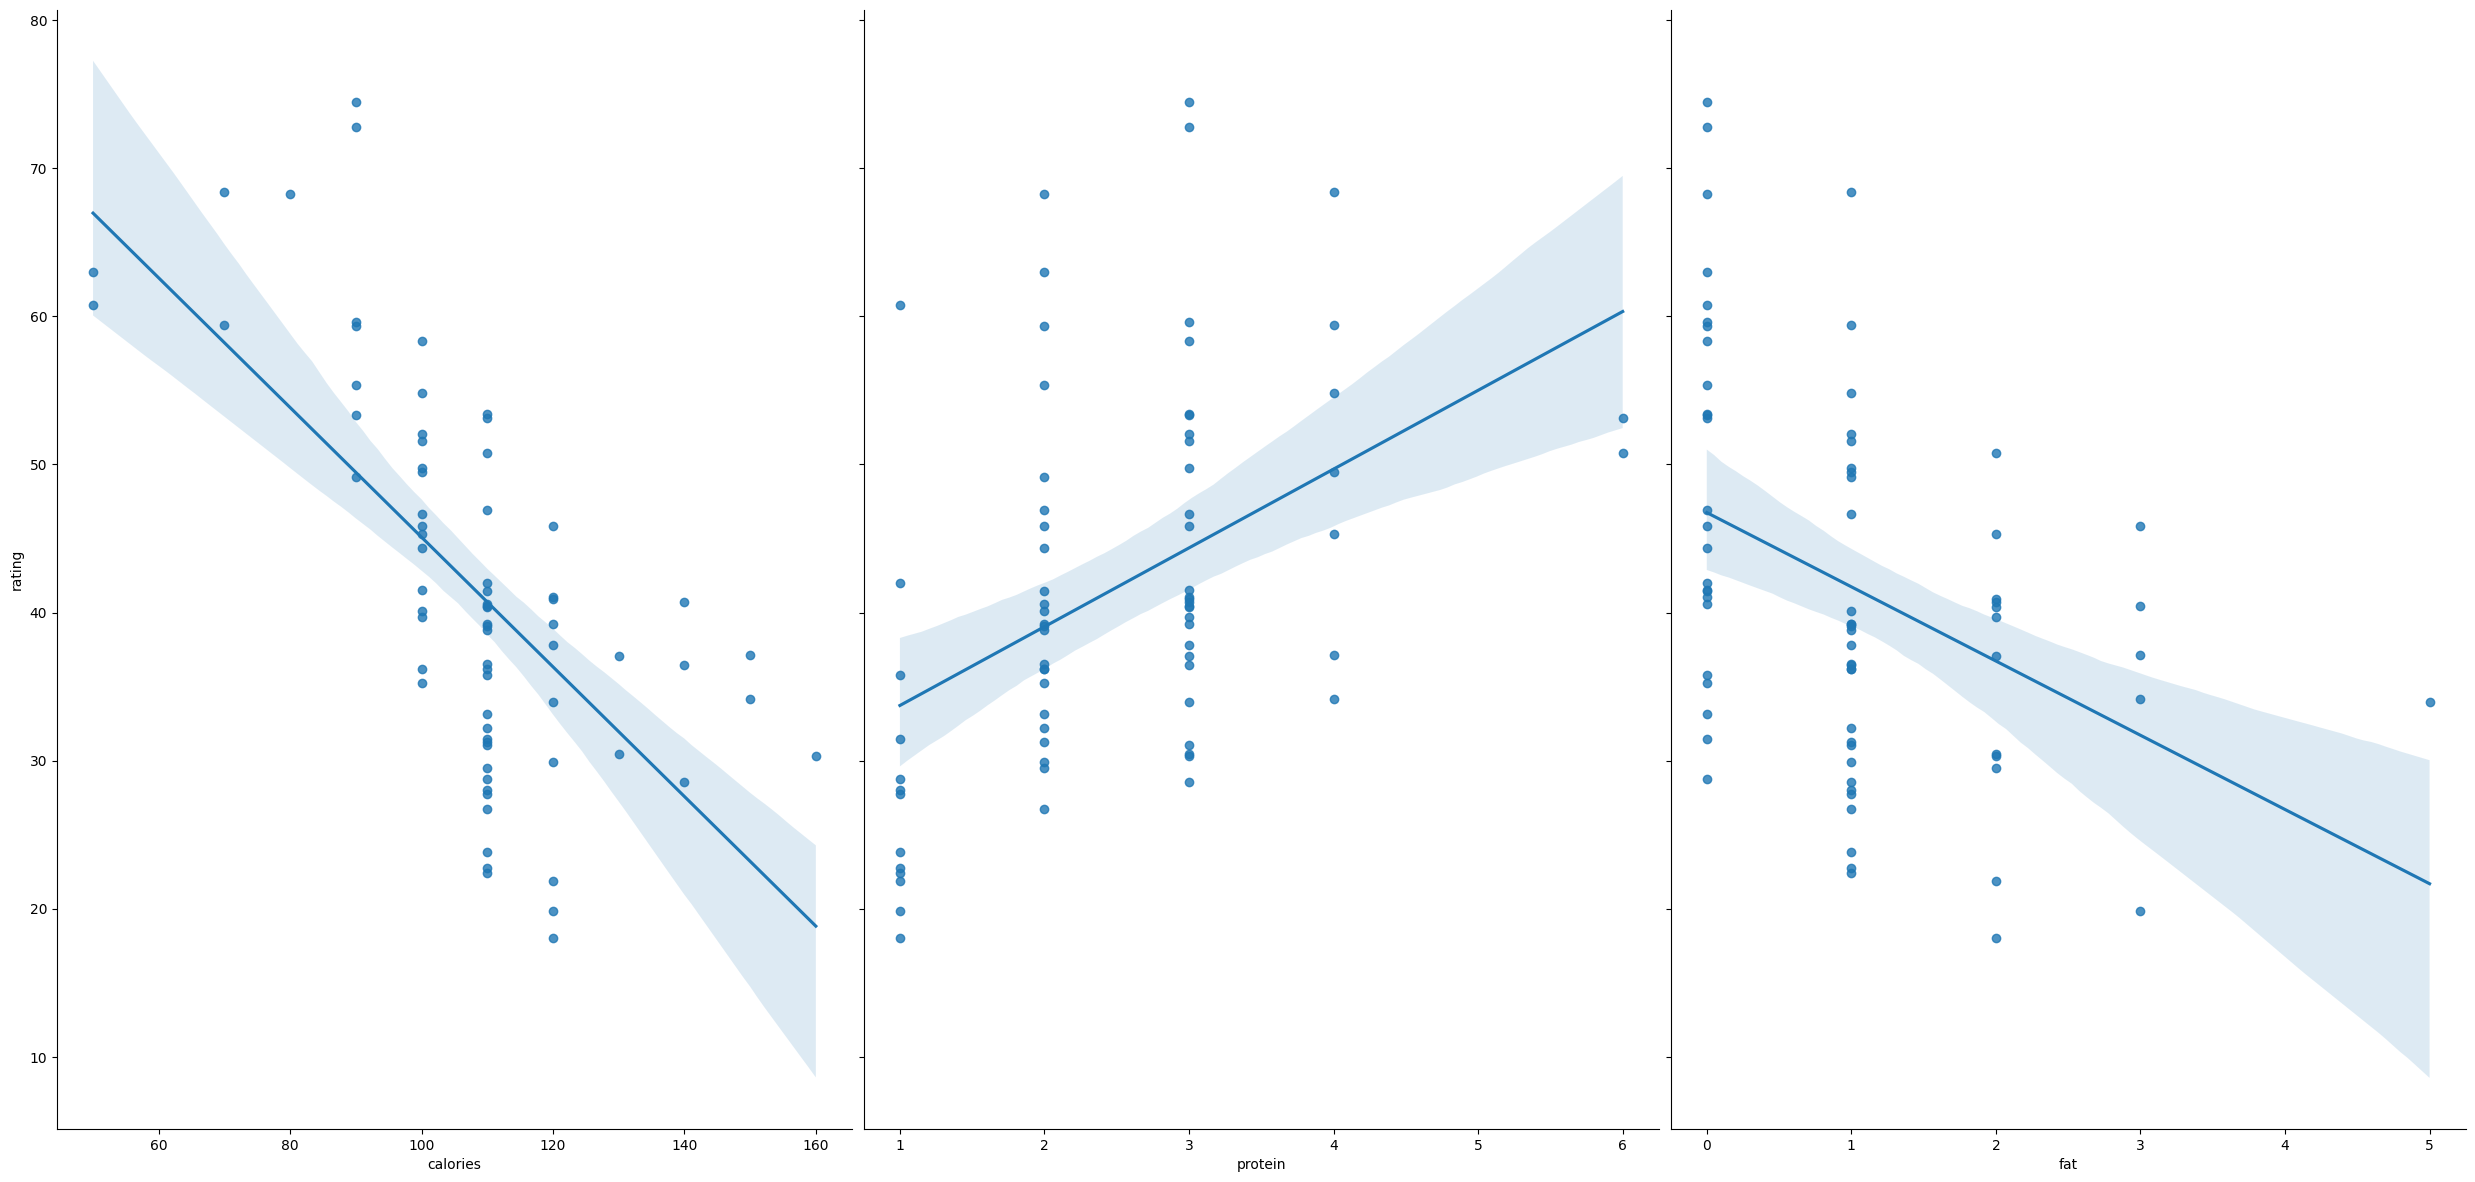

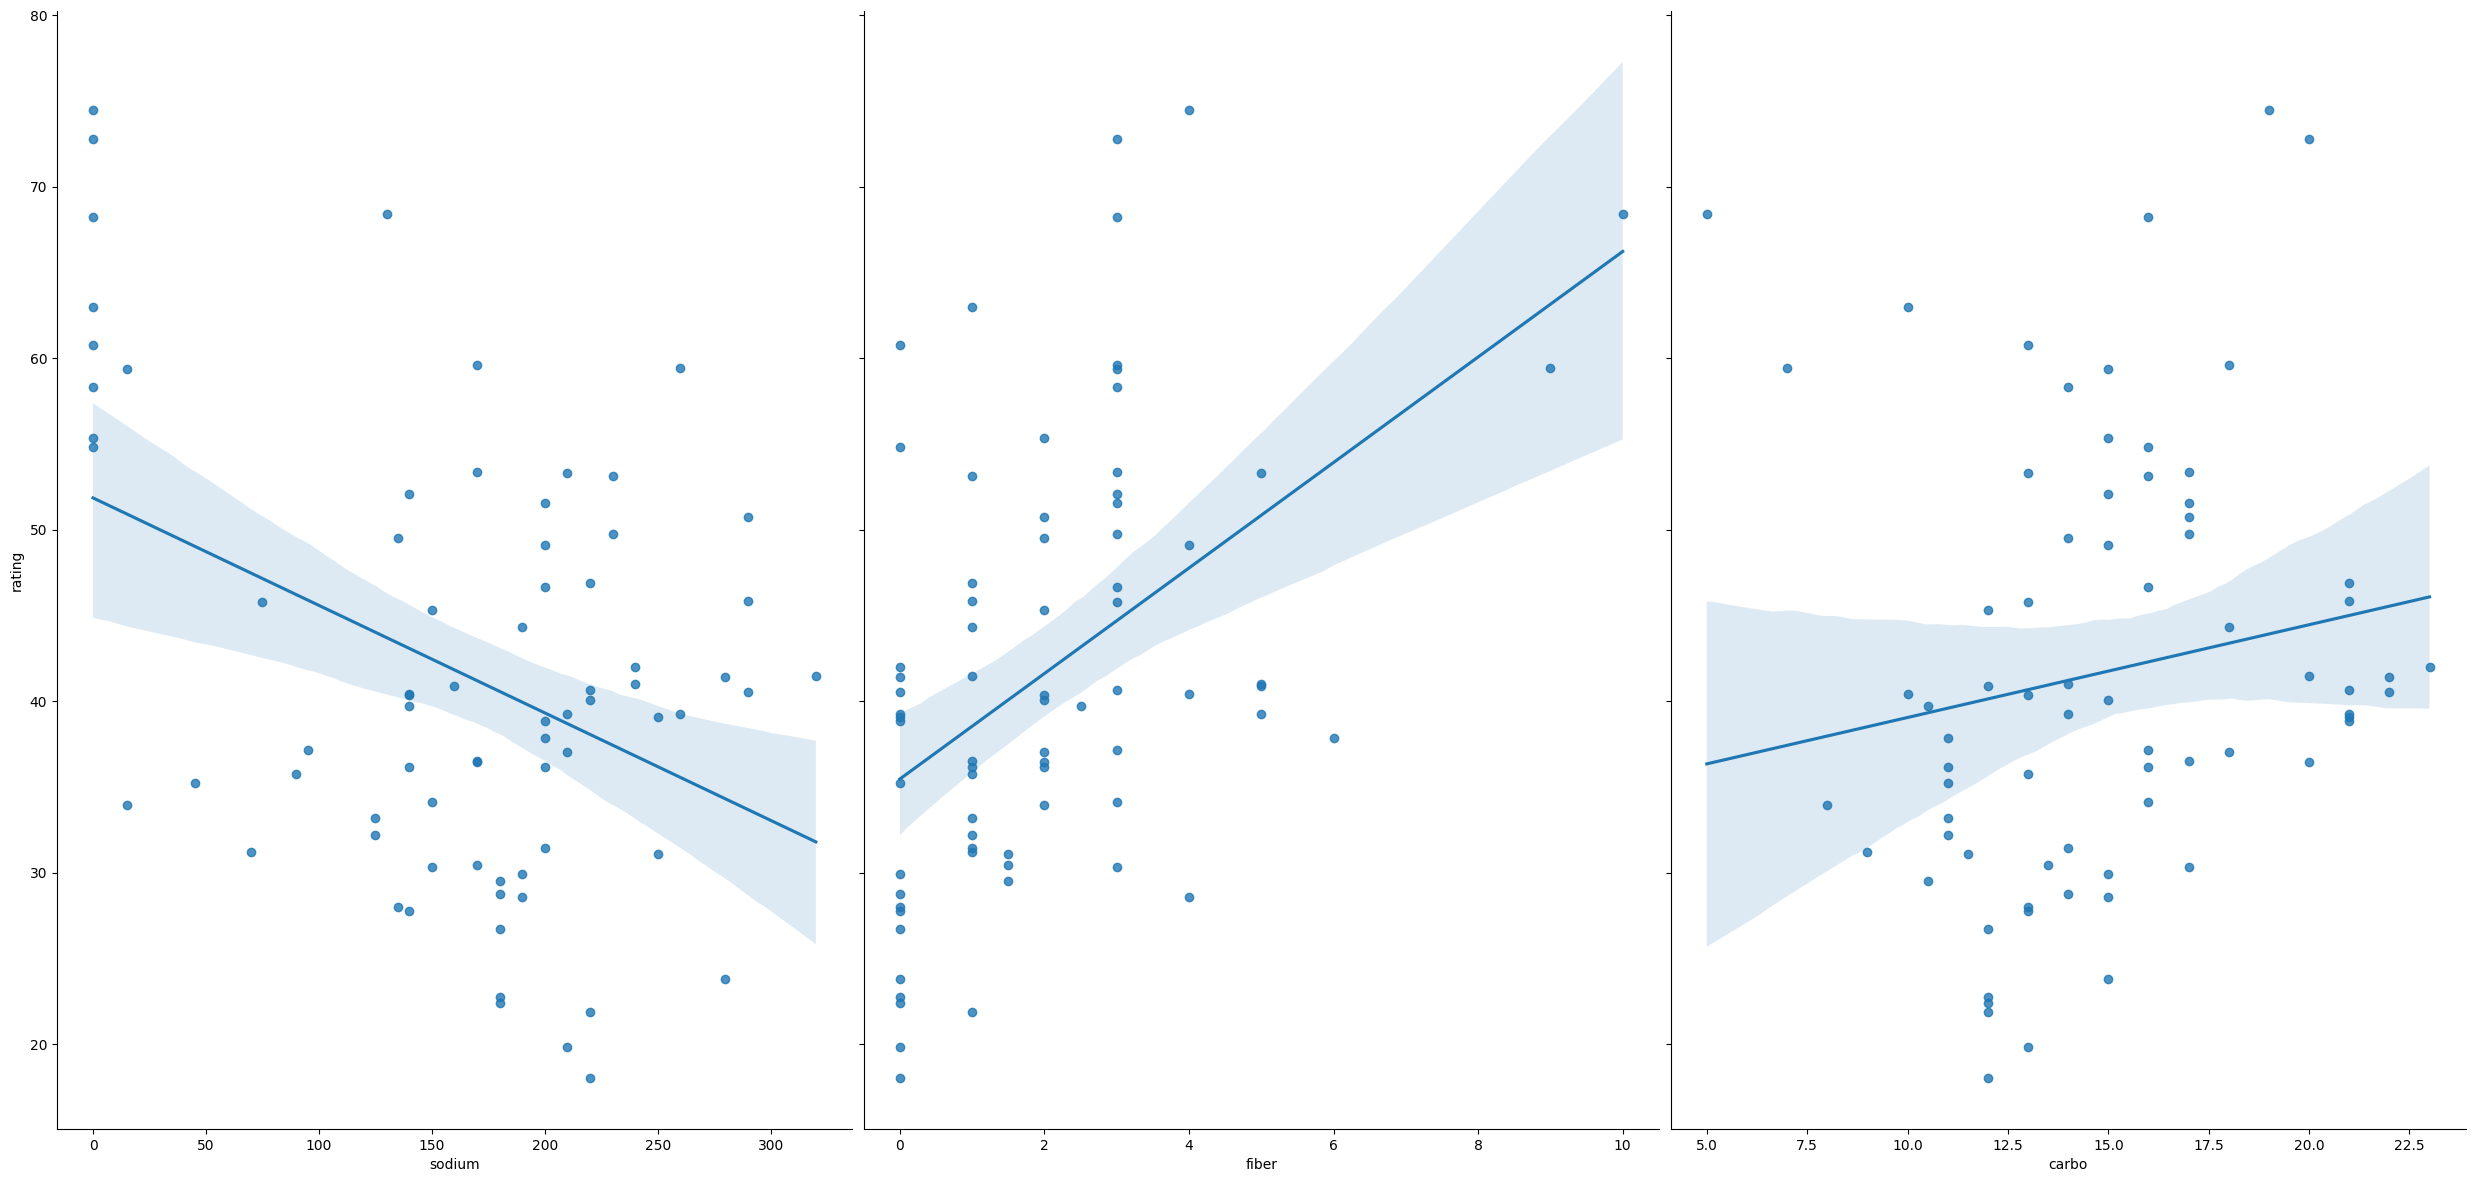

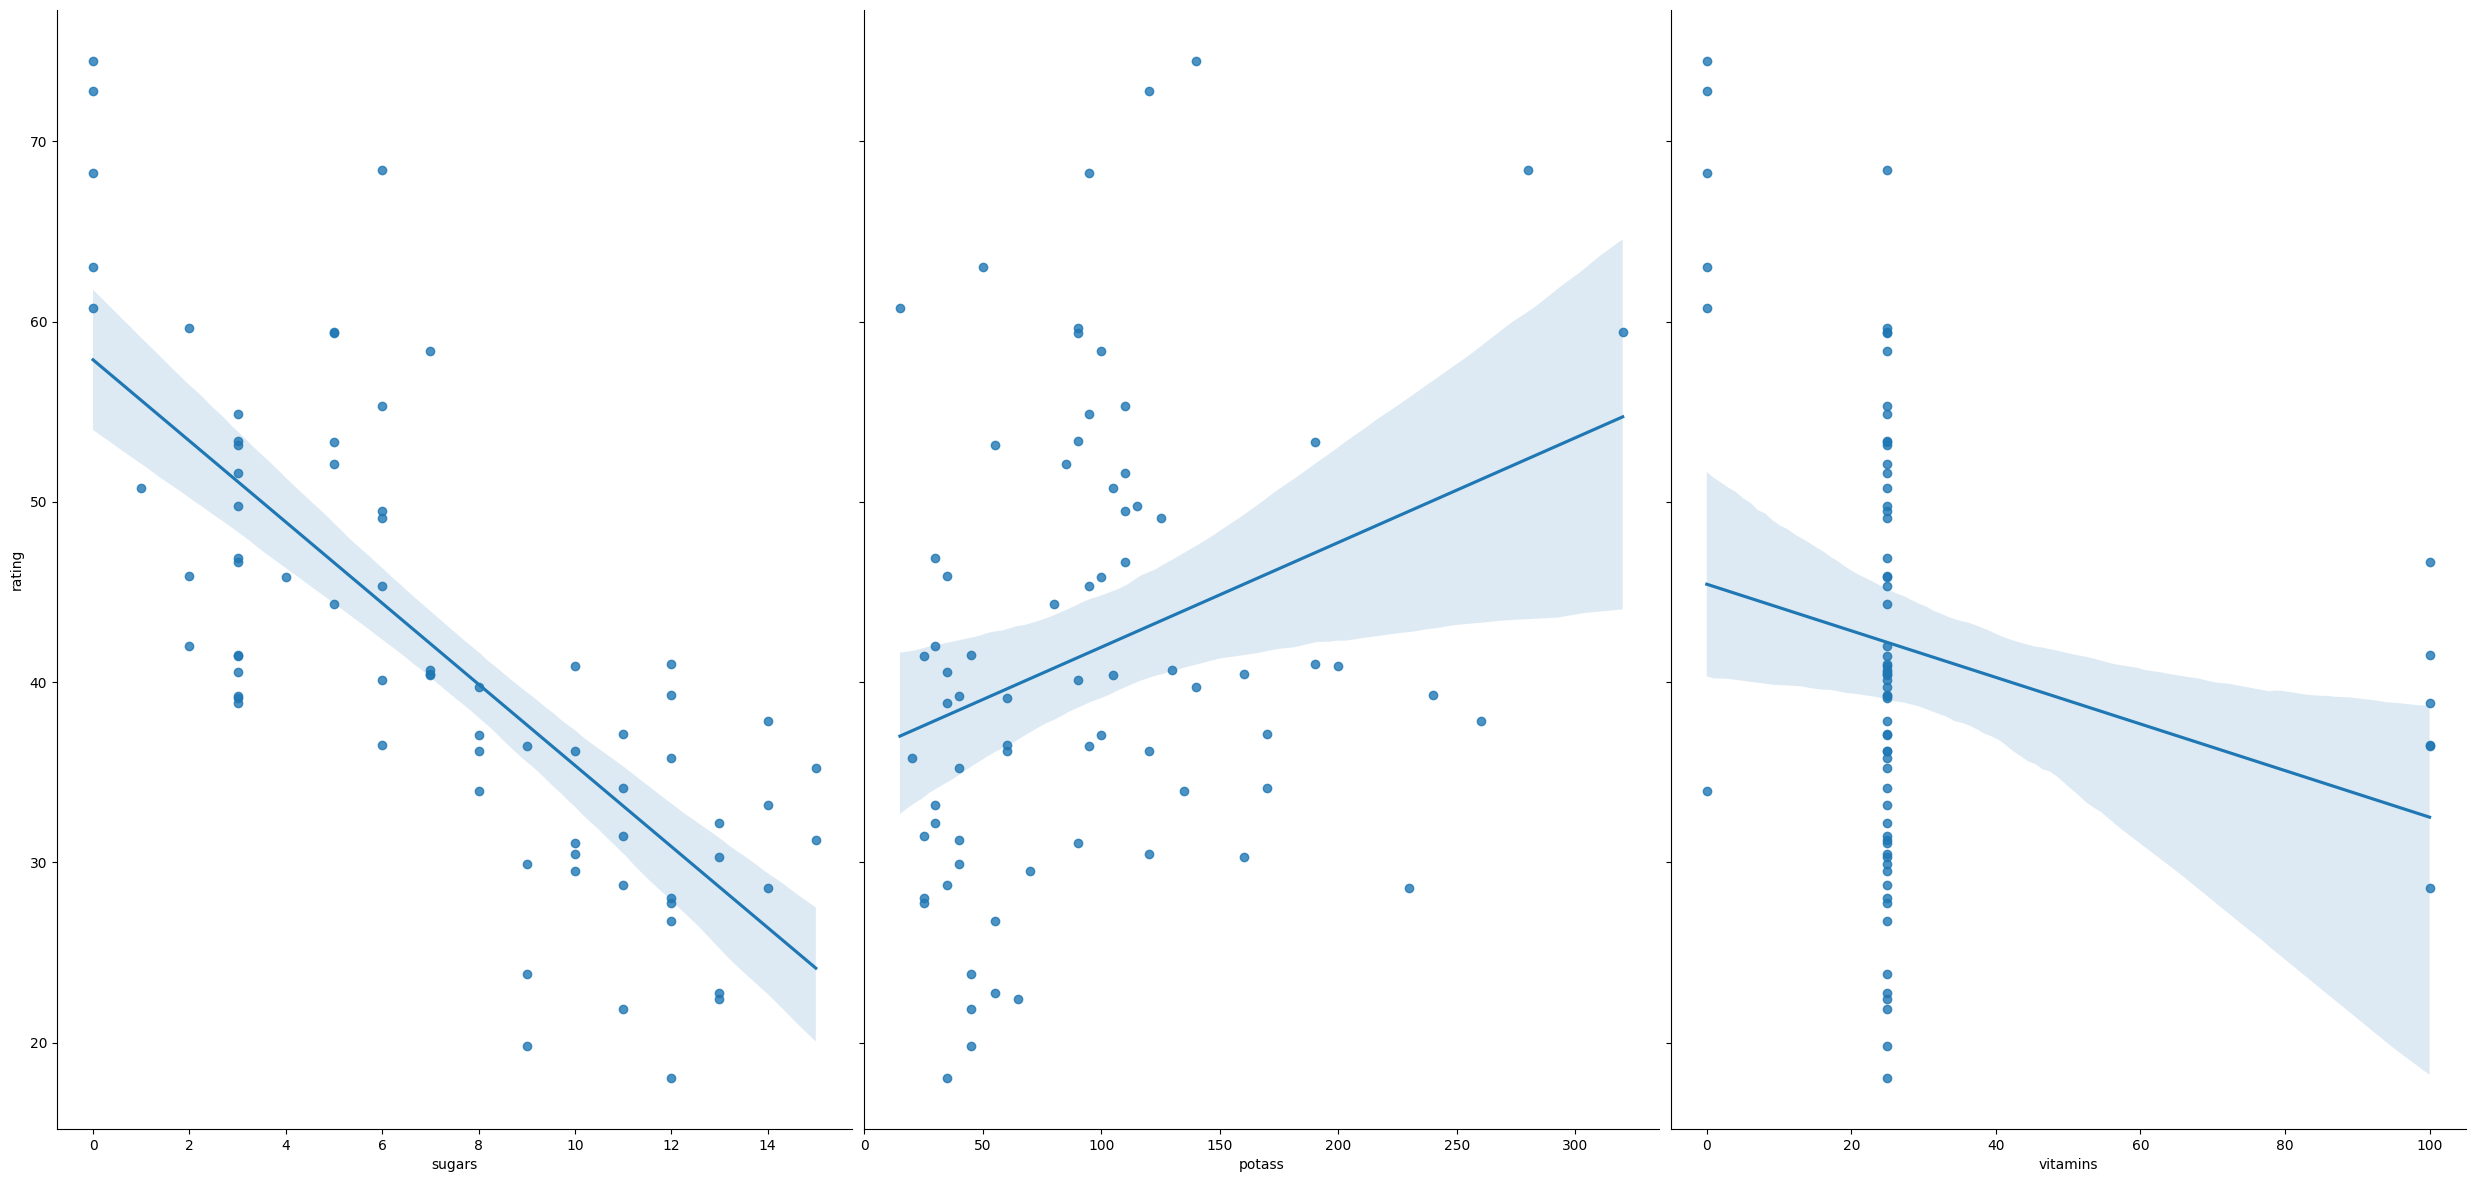

In [ ]:
sn.pairplot(DF, x_vars=['calories', 'protein', 'fat'], y_vars='rating', size=12, aspect=0.7, kind='reg')
sn.pairplot(DF, x_vars=['sodium', 'fiber', 'carbo'], y_vars='rating', size=12, aspect=0.7, kind='reg')
sn.pairplot(DF, x_vars=['sugars', 'potass', 'vitamins'], y_vars='rating', size=12, aspect=0.7, kind='reg')

In [ ]:
from sklearn.metrics import mean_squared_error
x_test=sm.add_constant(x_test)
y_pred=model.predict(x_test)
print("MSE: ",metrics.mean_absolute_error(y_test, y_pred))
print("MSA: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE:  3.5404778178834327e-07
MSA:  1.861564874737803e-13
RMSE:  4.314585582344848e-07


In [ ]:
df_new.drop(["shelf_1","shelf_2","shelf_3"],axis='columns',inplace=True)

In [ ]:
df_new.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,70,4,1,130,10.0,5.0,6,280,25,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,59.425505
3,110,2,2,180,1.5,10.5,10,70,25,29.509541
4,110,2,0,125,1.0,11.0,14,30,25,33.174094


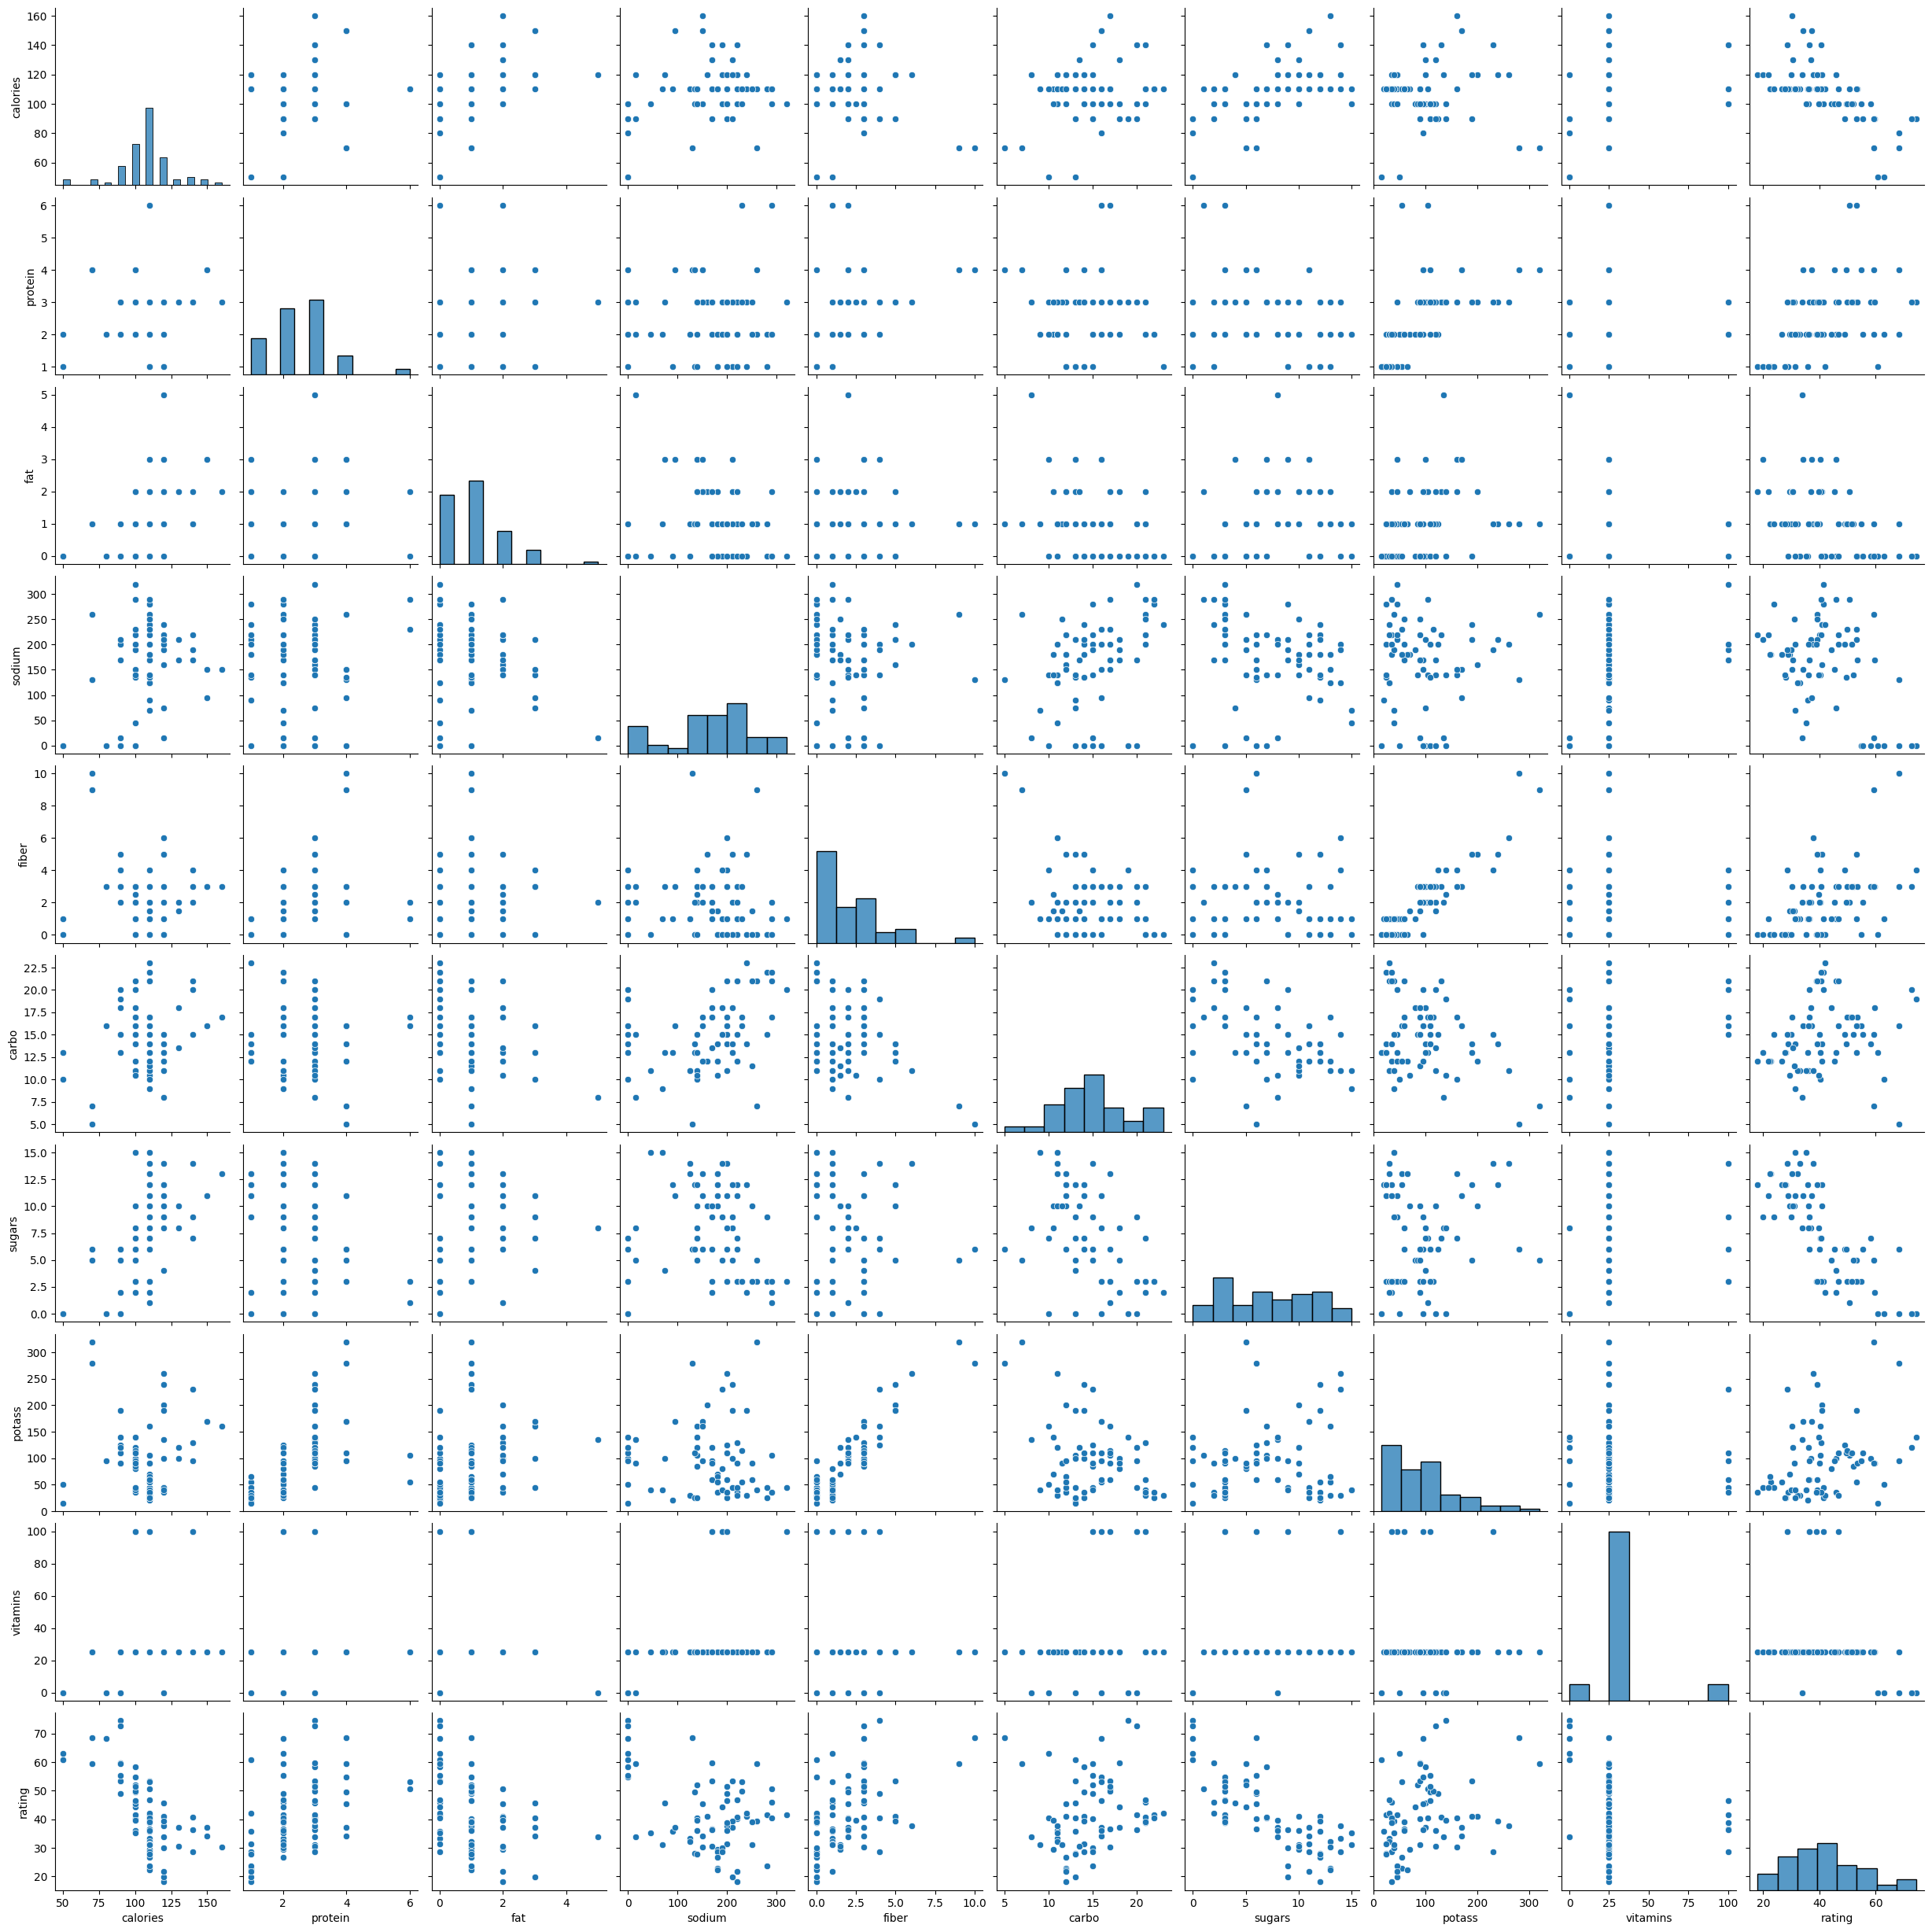

In [ ]:
sn.pairplot(df_new)

**b**. **Classification**

In [ ]:
df_new['CategoricalRating'] = pd.cut(x=df_new['rating'], bins=[18,36.9,55.7,74.5],labels=['Bad','Neutral','Good'])
df_new.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating,CategoricalRating
0,70,4,1,130,10.0,5.0,6,280,25,68.402973,Good
1,120,3,5,15,2.0,8.0,8,135,0,33.983679,Bad
2,70,4,1,260,9.0,7.0,5,320,25,59.425505,Good
3,110,2,2,180,1.5,10.5,10,70,25,29.509541,Bad
4,110,2,0,125,1.0,11.0,14,30,25,33.174094,Bad


In [ ]:
df_new.drop(["rating"],axis='columns',inplace=True)
df_new.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,CategoricalRating
0,70,4,1,130,10.0,5.0,6,280,25,Good
1,120,3,5,15,2.0,8.0,8,135,0,Bad
2,70,4,1,260,9.0,7.0,5,320,25,Good
3,110,2,2,180,1.5,10.5,10,70,25,Bad
4,110,2,0,125,1.0,11.0,14,30,25,Bad


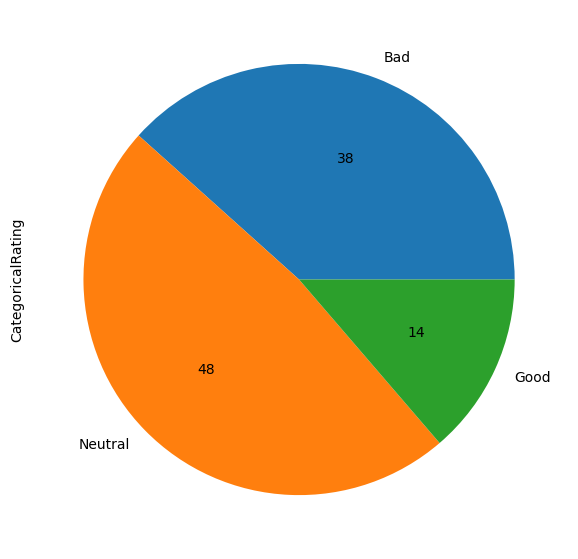

In [ ]:
plt.figure(figsize=(7,7))
df_new.groupby('CategoricalRating')['CategoricalRating'].count().plot.pie(autopct = '%2.0f')
plt.show()

In [ ]:
y=df_new.values[:,9]

In [ ]:
X=df_new.values[:,0:9]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

**SVM**

In [ ]:
model_svc = SVC(kernel = 'linear', C = 1E10)
model_svc.fit(X, y)
y_pred = model_svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 1.0

Confusion Matrix
[[7 0 0]
 [0 1 0]
 [0 0 7]]


**DECISION** **TREE**

In [ ]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train,y_train)
y_pred = model_dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

Accuracy: 0.7333333333333333

Confusion Matrix
[[7 0 0]
 [0 0 1]
 [3 0 4]]


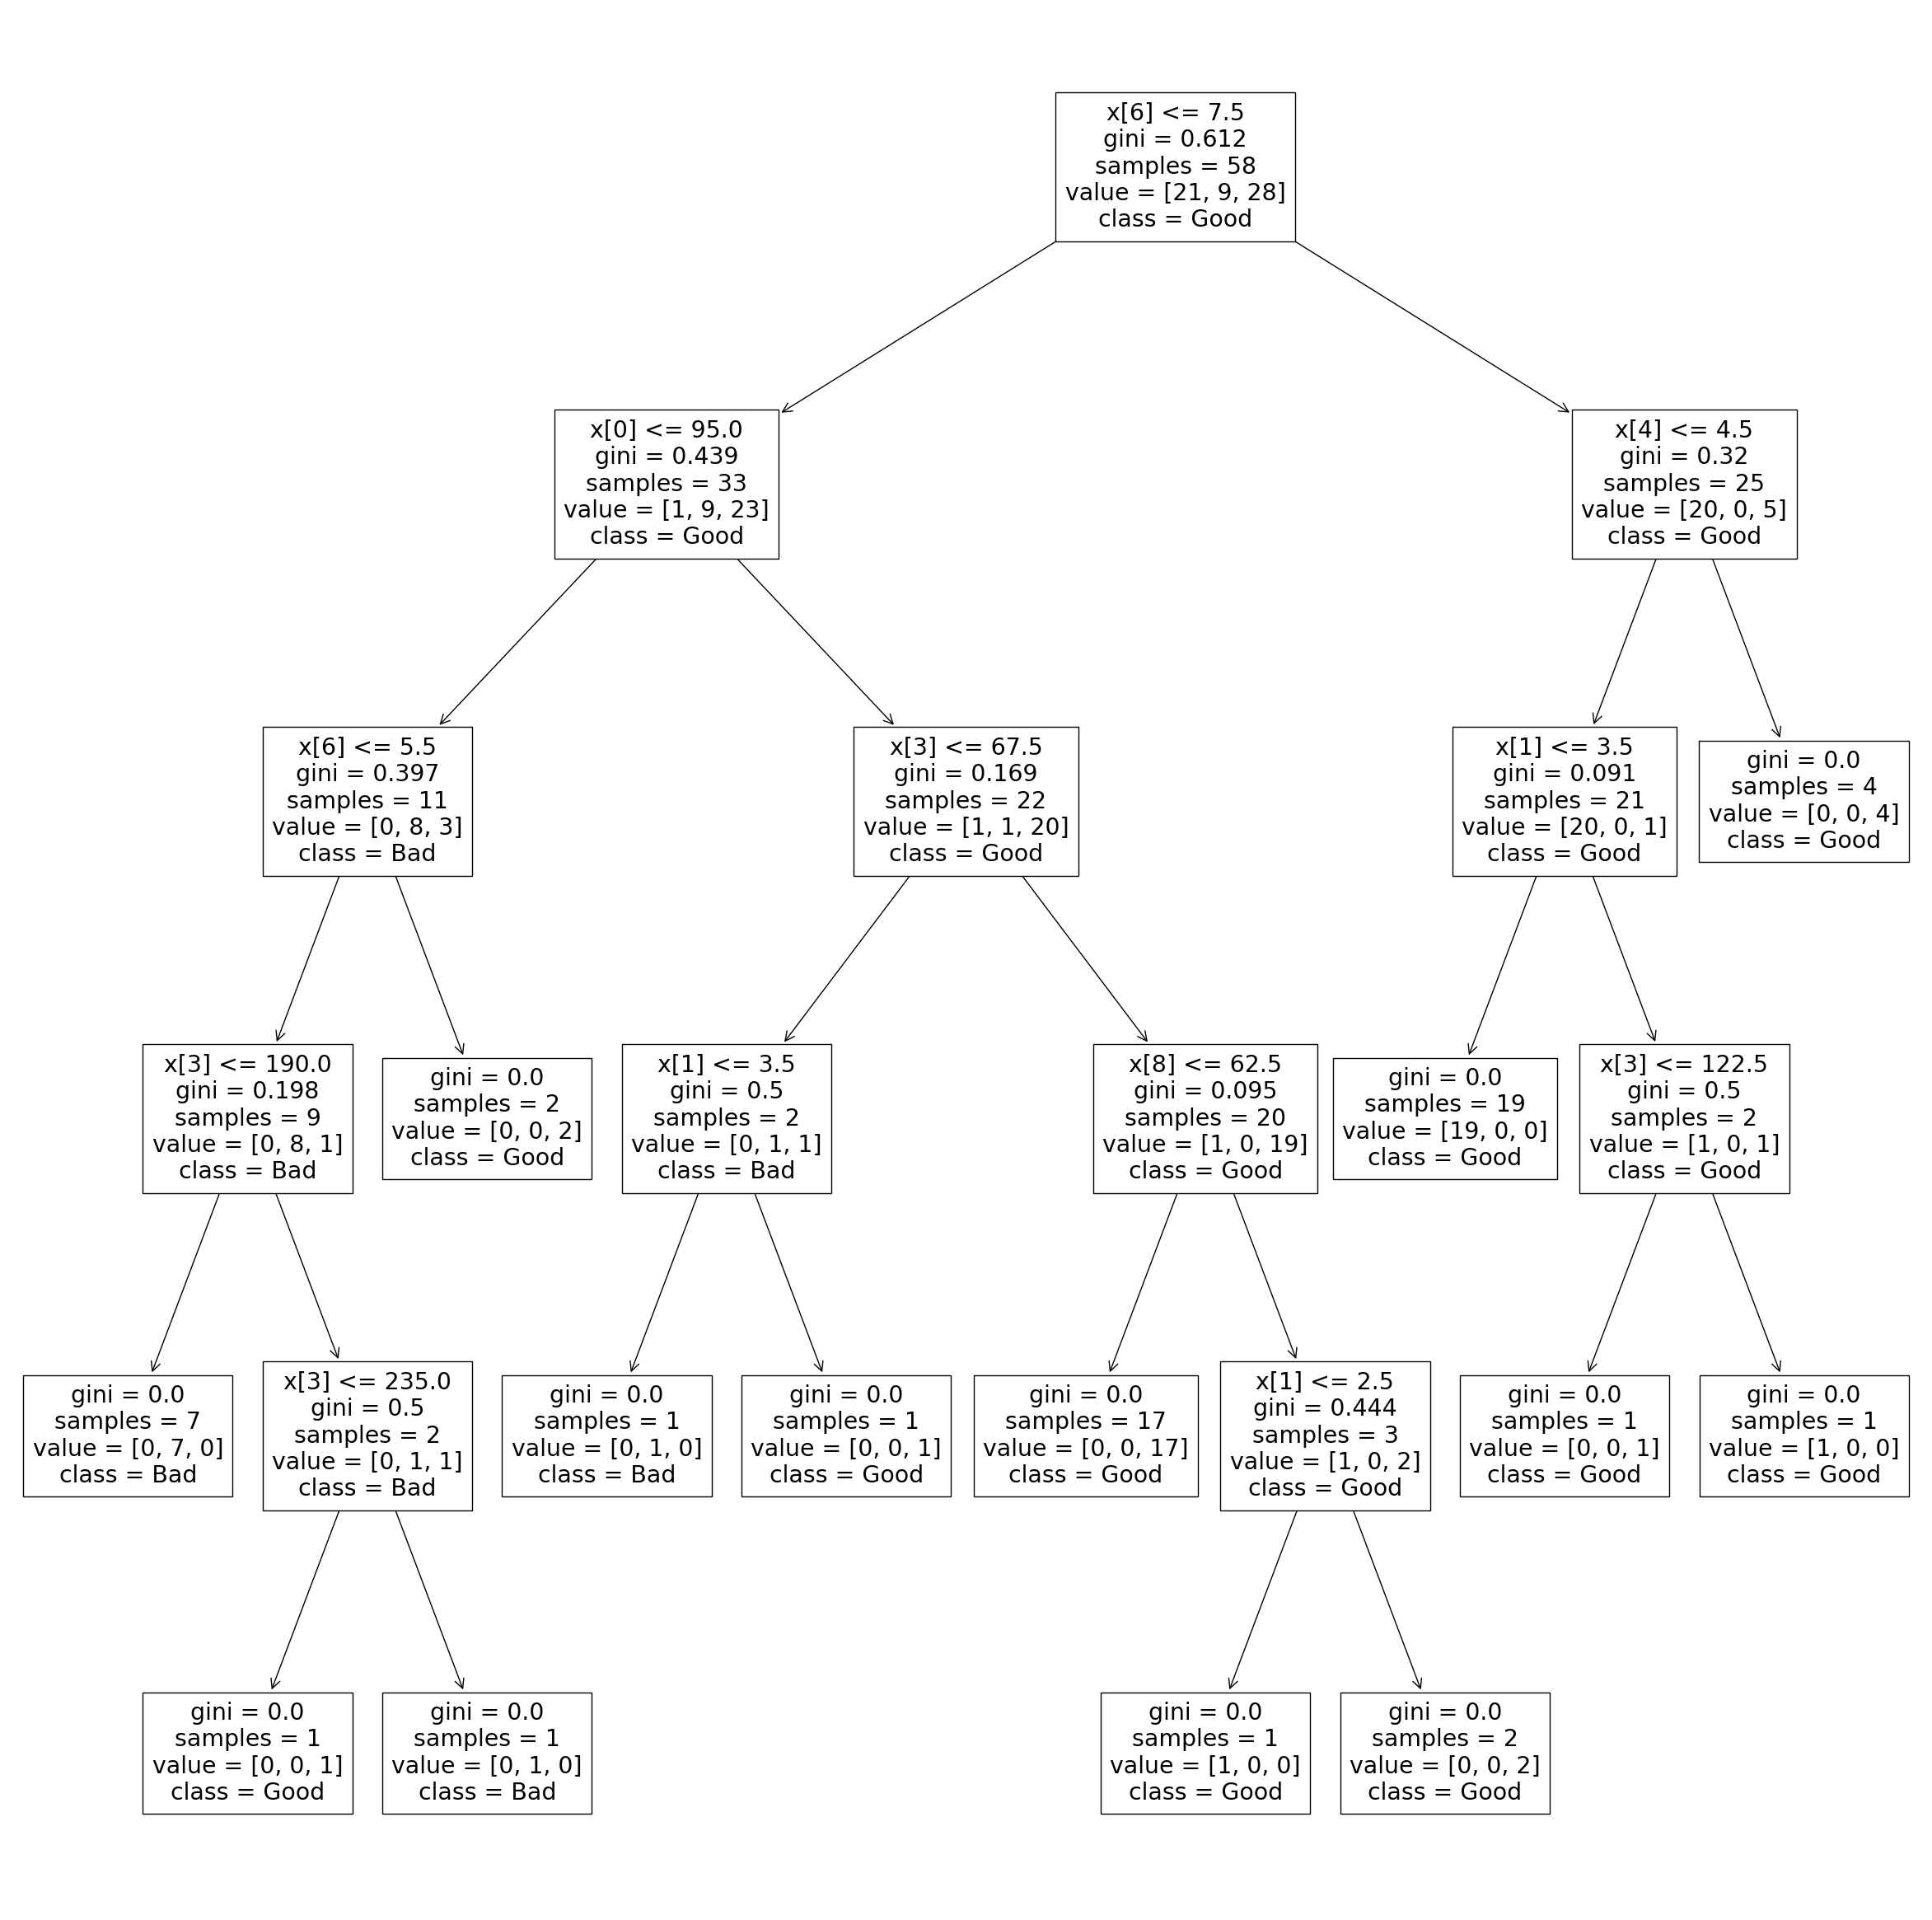

In [ ]:

fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(model_dtc,class_names=df_new['CategoricalRating'])

In [ ]:
model_dtcc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_dtcc.fit(X_train,y_train)
y_pred = model_dtcc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)


Accuracy: 0.8

Confusion Matrix
[[7 0 0]
 [0 0 1]
 [2 0 5]]


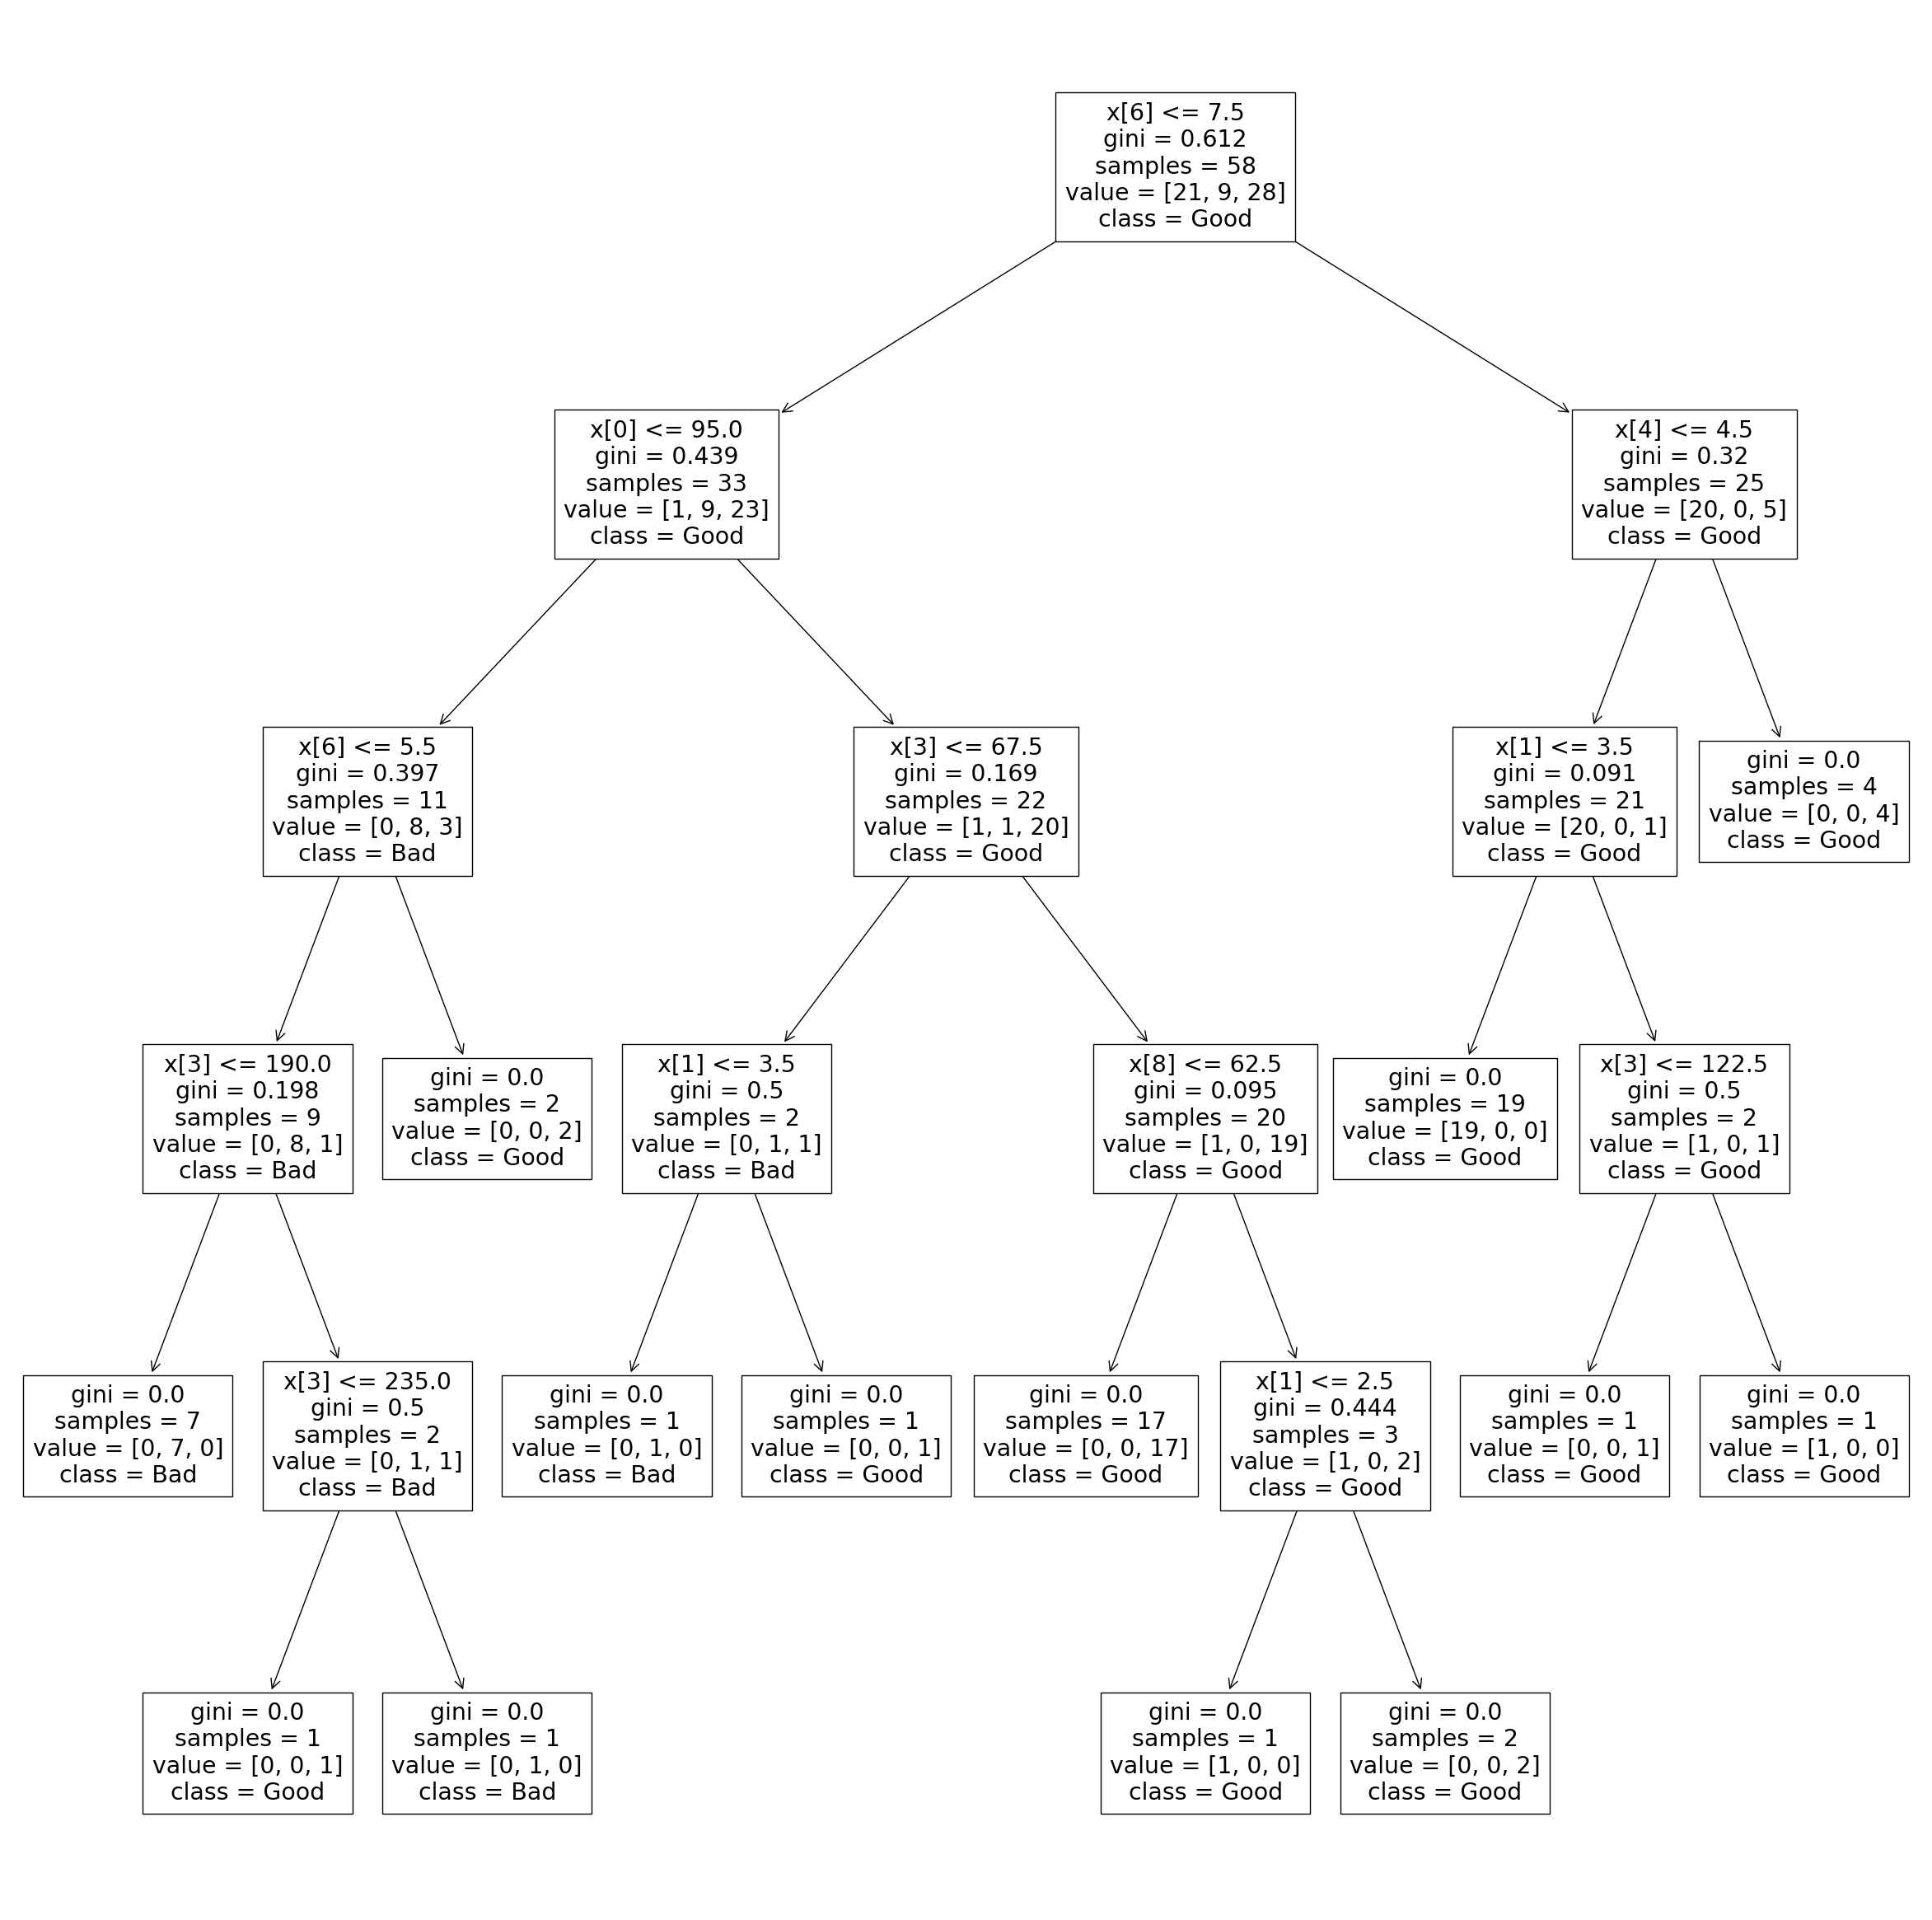

In [ ]:

text = tree.export_text(model_dtc)
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(model_dtc,class_names=df_new['CategoricalRating'])

**NAIVE** **BAYES**

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train , y_train)
y_predicted = model_nb.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
print("Accuracy: ",metrics.accuracy_score(y_test, y_predicted))
print()
print("Confusion Matrix")
print(cm)

Accuracy:  0.9333333333333333

Confusion Matrix
[[6 0 1]
 [0 1 0]
 [0 0 7]]


**RANDOM** **FOREST**

In [ ]:
model_rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Confusion Matrix
[[7 0 0]
 [0 1 0]
 [2 0 5]]

Accuracy:  0.8666666666666667


**4**. **Model** **Comparison** **bold text**& **Validation**

In [ ]:
kfold = model_selection.KFold(n_splits=10)
M = []

s = SVC(kernel = 'linear', C = 1E10)
d = DecisionTreeClassifier()
n = GaussianNB()
r = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

M.append(('SVM', s))
M.append(('DT', d))
M.append(('NB', n))
M.append(('RF', r))

results = []
names = []
scoring = 'accuracy'
for name, model in M:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    Mean_SDV = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(Mean_SDV)

SVM: 0.876667 (0.110604)
DT: 0.770000 (0.152352)
NB: 0.823333 (0.139084)
RF: 0.790000 (0.185023)


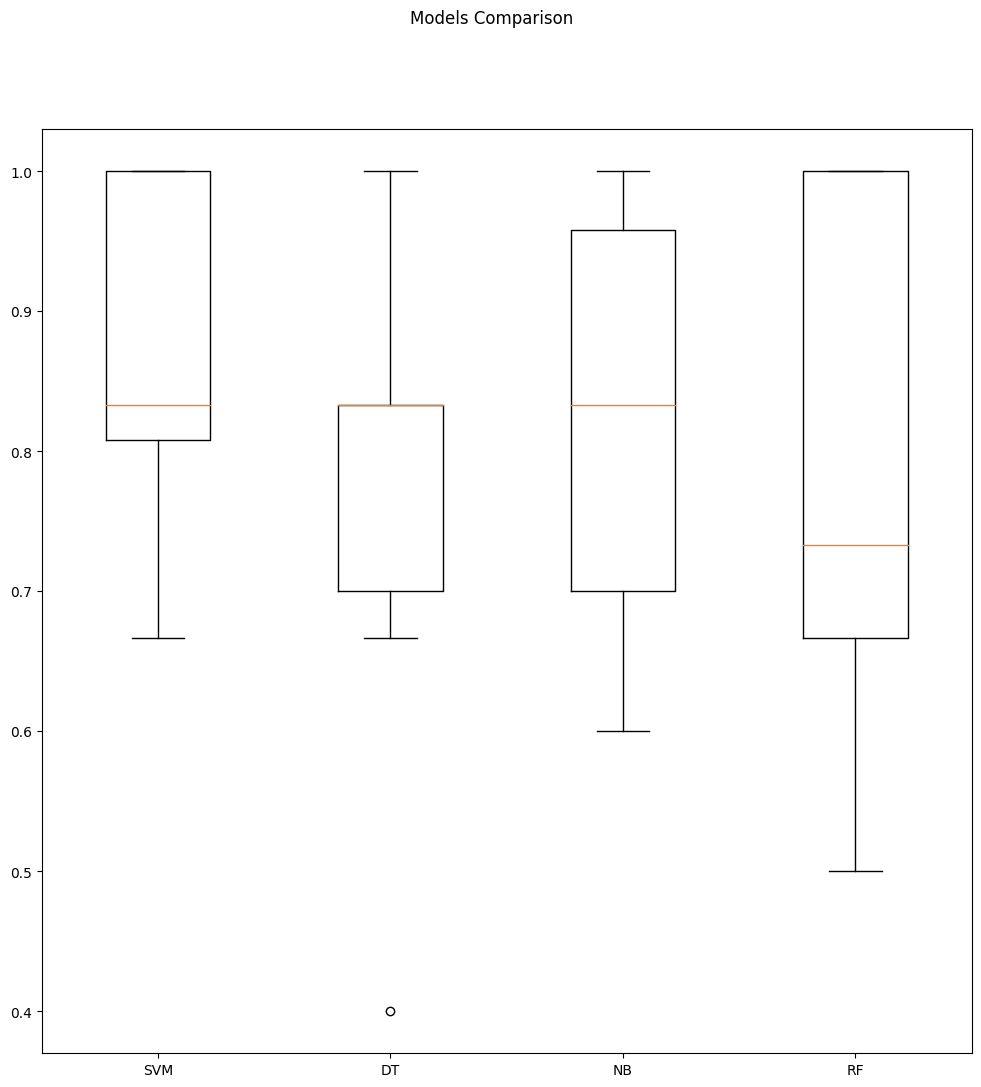

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Models Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

